# A/B Testing Analysis: Music Streaming Recommendation Flow

## Overview
This Python script performs an A/B testing analysis for a music streaming service's recommendation system. The goal is to determine if "Flow B" achieves the target average listening time of 2 minutes per user.


## Dataset Generation
- **Sample Size**: 120 users
- **Distribution**: Normal distribution with:
  - Hypothetical mean: 1.22 minutes
- **Data Processing**: Negative values clipped to 0.1 minutes (physically impossible values removed)

In [13]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_users = 120
hypothetical_mean = 2.4
standard_deviation = 0.8

listening_time = np.random.normal(loc=hypothetical_mean, scale=standard_deviation, size=n_users)

listening_time = np.maximum(listening_time, 0.1)

df_ab_test = pd.DataFrame({
    'user_id': range(1, n_users + 1),
    'group': 'Flow B',
    'listening_time_min': listening_time
})

df_ab_test.to_csv('music_streaming_recommendation_test_data.csv', index=False)

sample_mean = df_ab_test['listening_time_min'].mean()
sample_std = df_ab_test['listening_time_min'].std()
standard_error = sample_std / np.sqrt(n_users)

print("Key Statistics for Flow B")
print(f"Sample Mean: {sample_mean:.3f} minutes")
print(f"Sample Standard Deviation: {sample_std:.3f} minutes")
print(f"Standard Error: {standard_error:.3f} minutes")
print(f"Sample Size: {n_users} users")

Key Statistics for Flow B
Sample Mean: 2.337 minutes
Sample Standard Deviation: 0.740 minutes
Standard Error: 0.068 minutes
Sample Size: 120 users


In [14]:
df = pd.read_csv('/content/music_streaming_recommendation_test_data.csv')

In [15]:
df.head()

,user_id,group,listening_time_min
0,1,Flow B,2.797371
1,2,Flow B,2.289389
2,3,Flow B,2.918151
3,4,Flow B,3.618424
4,5,Flow B,2.212677


## Data Visualization
- Histogram and boxplot generated to understand data distribution
- Identified outliers with listening times ≥ 4.5 minutes

<Axes: xlabel='listening_time_min', ylabel='Count'>

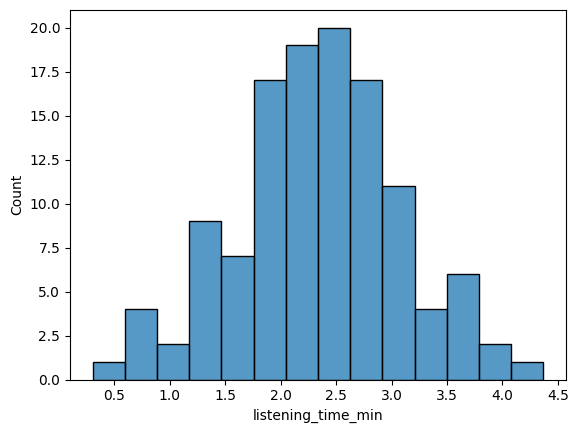

In [16]:
import seaborn as sns
sns.histplot(df['listening_time_min'])

<Axes: ylabel='listening_time_min'>

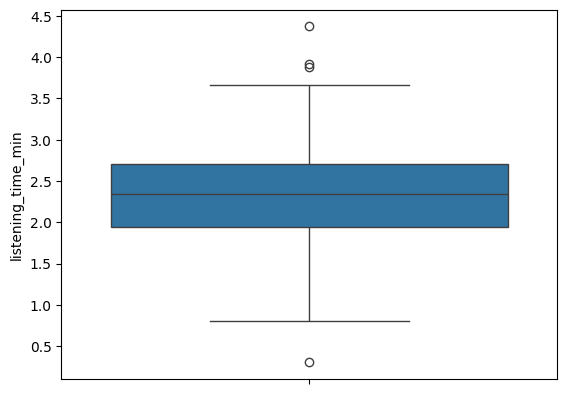

In [17]:
sns.boxplot(df['listening_time_min'])

In [18]:
df_filtered = df.loc[df['listening_time_min']>= 3.5]
df_filtered

,user_id,group,listening_time_min
3,4,Flow B,3.618424
6,7,Flow B,3.663370
20,21,Flow B,3.572519
31,32,Flow B,3.881823
71,72,Flow B,3.630429
73,74,Flow B,3.651715
82,83,Flow B,3.582315
106,107,Flow B,3.908949
113,114,Flow B,4.370594


## Confidence Interval Calculation
- **Confidence Level**: 90%
- **t-value**: 1.658 (from Student's t-distribution)
- **90% Confidence Interval**: [2.22; 2.45] minutes
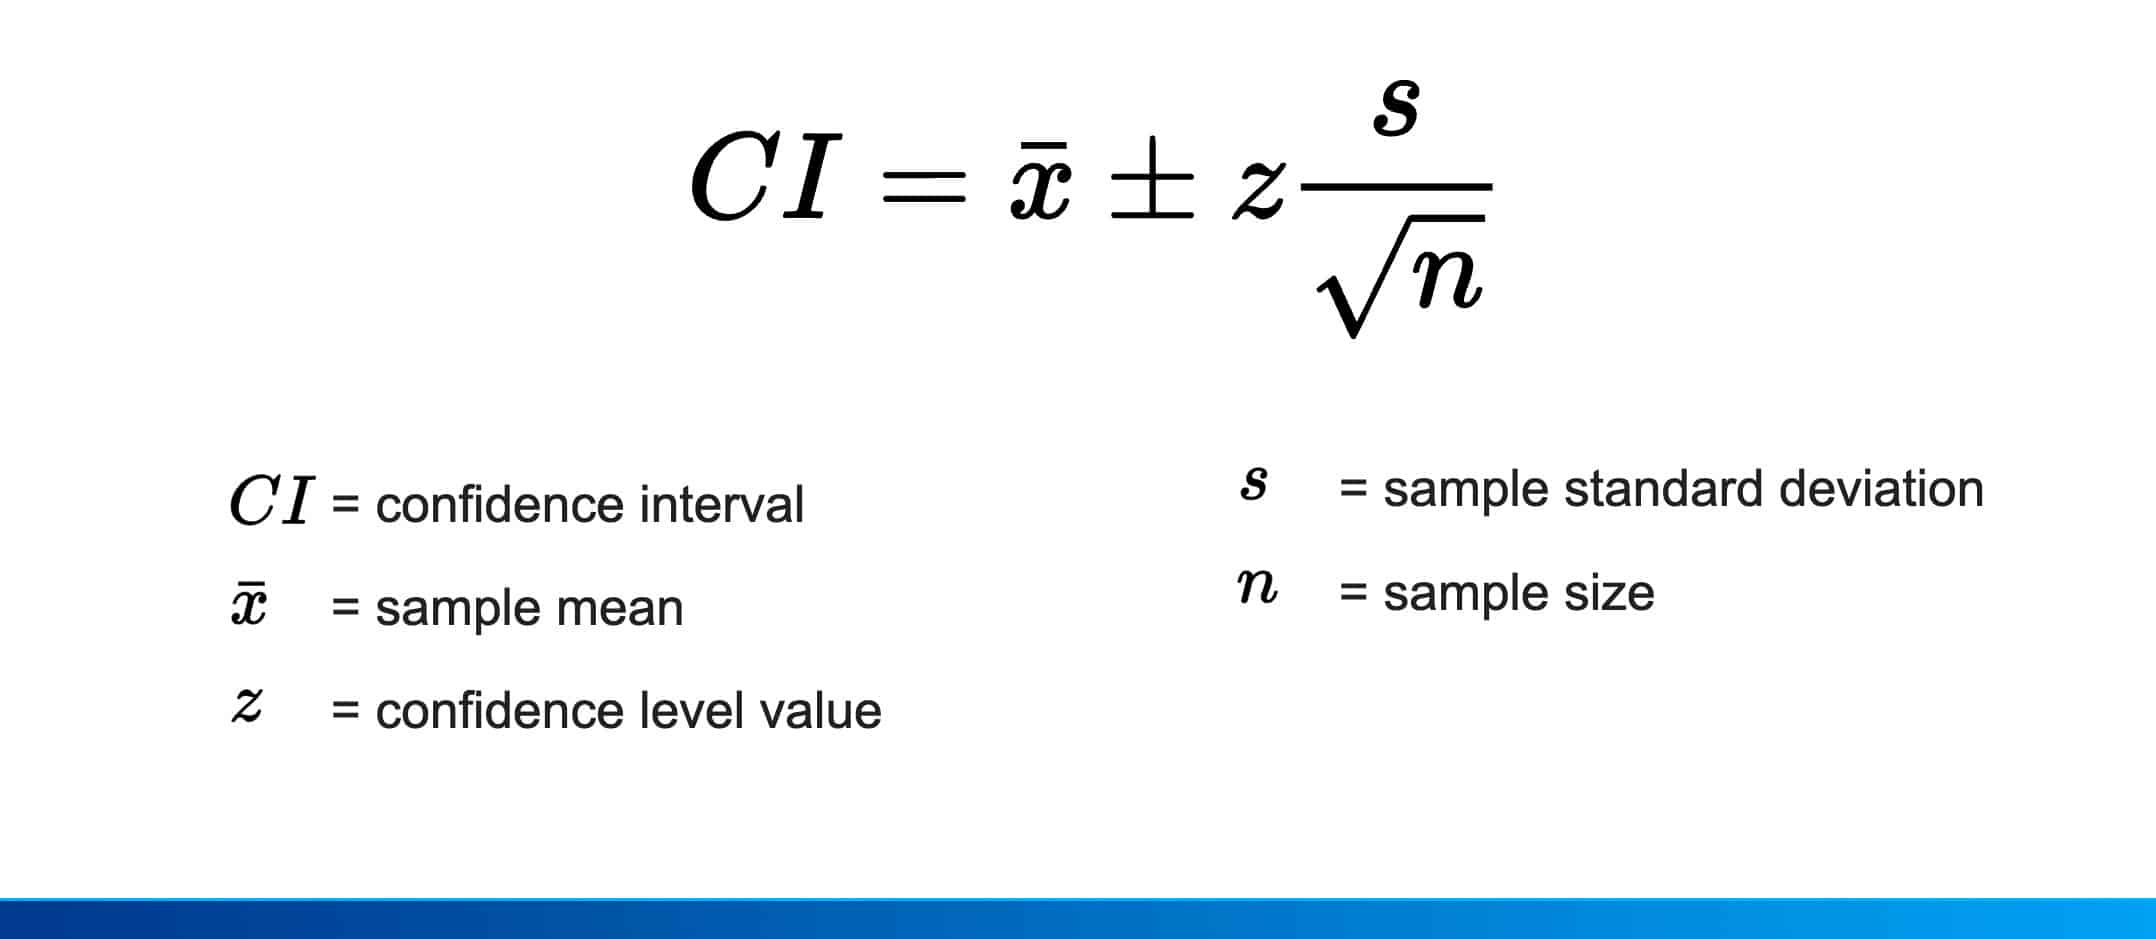

In [19]:
from math import sqrt

std = df['listening_time_min'].std()
n = df['user_id'].count()
mean = df['listening_time_min'].mean()
margin_of_error = (1.658 * std) / sqrt(n)  # 1.658 from T-Student Table for 90%
upper_bound = mean + margin_of_error
lower_bound = mean - margin_of_error

print('Confidence Interval:')
print(f'[{lower_bound:.2f}; {upper_bound:.2f}]')

Confidence Interval:
[2.22; 2.45]



## Hypothesis Testing
- **Null Hypothesis (H0)**: Mean listening time = 2 minutes
- **Alternative Hypothesis (H1)**: Mean listening time ≠ 2 minutes


## Conclusion

The 90% confidence interval [2.22; 2.45] minutes does not contain the target value of 2 minutes. Therefore, we reject the null hypothesis with 90% confidence.

**We can confirm with 90% confidence that Flow B successfully exceeds the objective**, achieving a mean listening time significantly higher than the 2-minute target. The implementation of Flow B has statistically significantly increased user engagement compared to the previous flow (Flow A: 1.22 minutes).

**Business Interpretation:** While we statistically reject the hypothesis that the mean equals exactly 2 minutes, this is actually a positive outcome since the true mean is confidently above the target, indicating successful improvement in user engagement.

# **P-value: Probability of your data if the null hypothesis is true.**
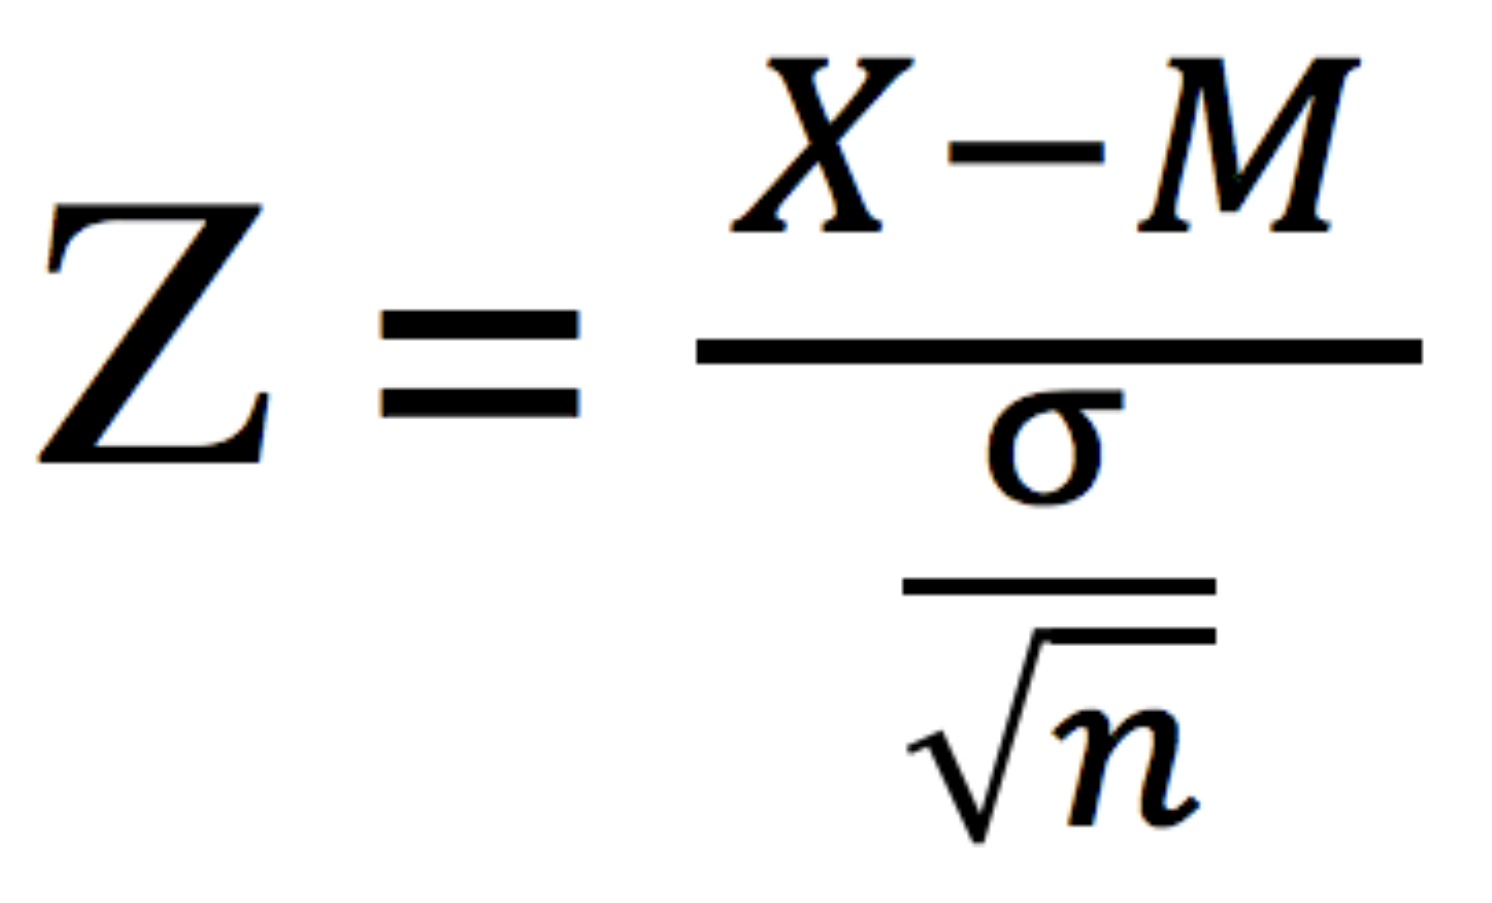
Small p-value: Strong evidence against the null hypothesis.
Large p-value: Insufficient evidence to reject the null hypothesis.
Standard deviation: Measures data spread - more spread means more noise, larger p-values.
Sample size (n): Determines estimate precision - larger samples give more reliable results.
Larger n reduces random error, making smaller effects detectable (smaller p-values).
Together, they determine the signal-to-noise ratio in your statistical test.

In [24]:
import math
import scipy.stats as stats

# Calculate standard error
d = math.sqrt(120)  # sqrt(n)
x = mean - 1.22     # difference between sample mean and hypothesized mean
y = std / d         # standard error
z = x / y           # t-statistic

# Calculate p-value for two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(z), df=119))

print(f"t-statistic: {z:.4f}")
print(f"p-value: {p_value:.4f}")

# Hypothesis test interpretation
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀ at {alpha*100}% significance level")
    print("There is sufficient evidence to reject the null hypothesis")
else:
    print(f"Fail to reject H₀ at {alpha*100}% significance level")
    print("There is insufficient evidence to reject the null hypothesis")

t-statistic: 16.5247
p-value: 0.0000
Reject H₀ at 5.0% significance level
There is sufficient evidence to reject the null hypothesis
